# ANÁLISIS DE LOTTO

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations

In [4]:
# --------- 1) CARGAR DATASET ----------
df = pd.read_csv(r"C:\Users\dagui\Downloads\lotto.csv")

In [6]:
numeros_cols = ['No 1','No 2','No 3','No 4','No 5','No 6']

total_sorteos = len(df)

# --------- 2) COLUMNA ÚNICA DE NÚMEROS ----------
all_numbers = pd.concat([df[col] for col in numeros_cols], ignore_index=True)
total_numeros = len(all_numbers)

print("Total sorteos:", total_sorteos)
print("Total números analizados:", total_numeros)

Total sorteos: 100
Total números analizados: 600


In [28]:
# --------- 3) FRECUENCIA DE NÚMEROS ----------
freq = all_numbers.value_counts().sort_index()

index = freq.index
values = freq.values
prob = (values / total_numeros)*100

freq_df = pd.DataFrame({
    'numero': index,
    'frecuencia': values,
    'probabilidad_empirica': [f"{p:.2f}%" for p in prob]
}).sort_values(by='frecuencia', ascending=False)

print("\nTop 15 números más frecuentes:")
display(freq_df.head(15))

print("\n15 números menos frecuentes:")
display(freq_df.tail(15))


Top 15 números más frecuentes:


,numero,frecuencia,probabilidad_empirica
26,27,24,4.00%
32,33,21,3.50%
27,28,21,3.50%
9,10,21,3.50%
29,30,20,3.33%
23,24,20,3.33%
37,38,19,3.17%
16,17,19,3.17%
4,5,19,3.17%
28,29,19,3.17%



15 números menos frecuentes:


,numero,frecuencia,probabilidad_empirica
15,16,15,2.50%
1,2,15,2.50%
13,14,14,2.33%
8,9,14,2.33%
17,18,13,2.17%
5,6,13,2.17%
12,13,12,2.00%
10,11,12,2.00%
30,31,12,2.00%
18,19,12,2.00%


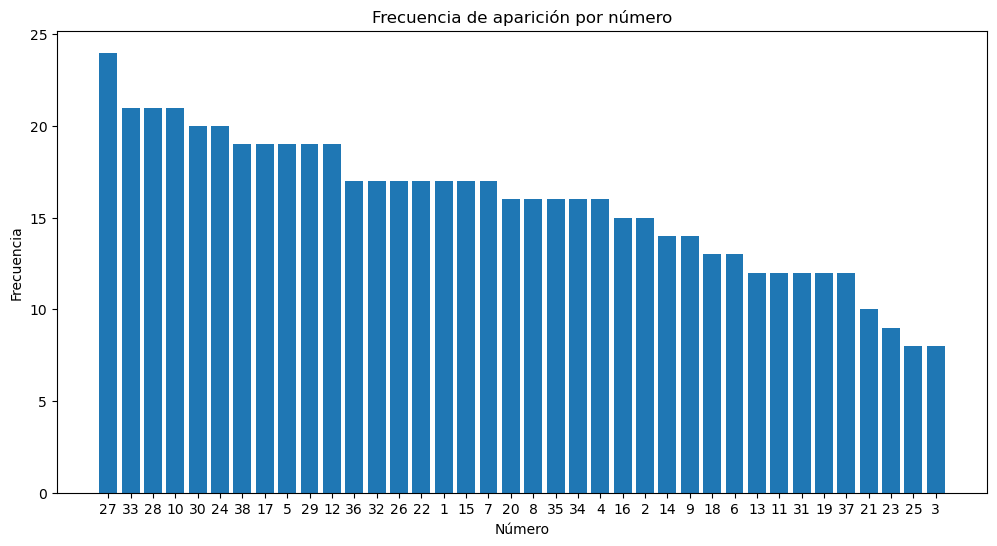

NameError: name 'fig' is not defined

In [105]:
# --------- 5) VISUALIZAR FRECUENCIA ----------
freq_ordenada = freq.sort_values(ascending=False)

plt.figure(figsize=(12,6))
plt.bar(freq_ordenada.index.astype(str), freq_ordenada.values) 
plt.title("Frecuencia de aparición por número")
plt.xlabel("Número")
plt.ylabel("Frecuencia")
plt.show()

In [30]:
# --------- 6) DISTRIBUCIÓN PARES VS IMPARES ----------
pares = sum(all_numbers % 2 == 0)
impares = sum(all_numbers % 2 != 0)

print("\nDistribución:")
print("Pares:", pares)
print("Impares:", impares)
print("Ratio pares/impares:", pares/impares)


Distribución:
Pares: 322
Impares: 278
Ratio pares/impares: 1.158273381294964


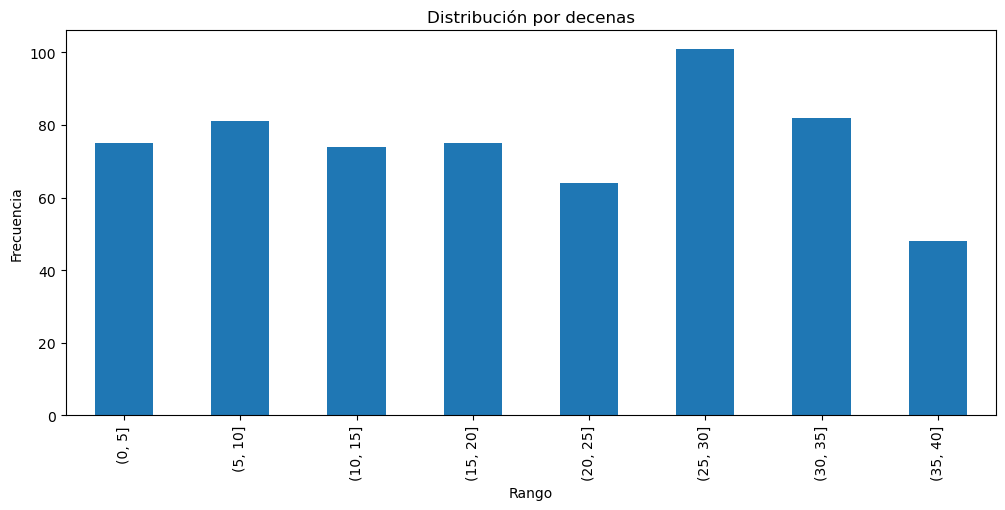

In [46]:
# --------- 7) DISTRIBUCIÓN POR DECENAS ----------
bins = pd.cut(all_numbers, bins=range(0,41,5))
decenas = bins.value_counts().sort_index()

plt.figure(figsize=(12,5))
decenas.plot(kind='bar')
plt.title("Distribución por decenas")
plt.xlabel("Rango")
plt.ylabel("Frecuencia")
plt.show()

In [47]:
# --------- 8) ANÁLISIS DE COMBINACIONES DE PARES ----------
pair_counter = Counter()

for _, row in df[numeros_cols].iterrows():
    nums = sorted(row.values)
    for pair in combinations(nums, 2):
        pair_counter[pair] += 1

top_pairs = pd.DataFrame(pair_counter.most_common(20), columns=['par','frecuencia'])
print("\nTop 20 pares más comunes:")
display(top_pairs)


Top 20 pares más comunes:


,par,frecuencia
0,"(12, 27)",8
1,"(27, 33)",8
2,"(1, 24)",7
3,"(1, 5)",7
4,"(7, 26)",6
5,"(6, 33)",6
6,"(27, 28)",6
7,"(28, 35)",6
8,"(10, 26)",6
9,"(10, 29)",6


In [103]:
# --------- 9) ANÁLISIS DE TRÍOS ----------
trio_counter = Counter()

for _, row in df[numeros_cols].iterrows():
    nums = sorted(row.values)
    for trio in combinations(nums, 3):
        trio_counter[trio] += 1

top_trios = pd.DataFrame(trio_counter.most_common(15), columns=['trio','frecuencia'])
print("\nTop 15 tríos más comunes:")
top_trios.head(15)


Top 15 tríos más comunes:


,trio,frecuencia
0,"(12, 27, 30)",3
1,"(6, 8, 33)",3
2,"(6, 26, 33)",3
3,"(17, 27, 33)",3
4,"(8, 33, 38)",3
5,"(10, 26, 29)",3
6,"(15, 17, 21)",3
7,"(10, 26, 33)",3
8,"(1, 2, 24)",3
9,"(2, 10, 12)",3


In [70]:
# --------- 10) SUMA PROMEDIO POR SORTEO ----------
sumas = df[numeros_cols].sum(axis=1)

print("\nSuma promedio por sorteo:", sumas.mean())
print("\n\n")


Suma promedio por sorteo: 119.94





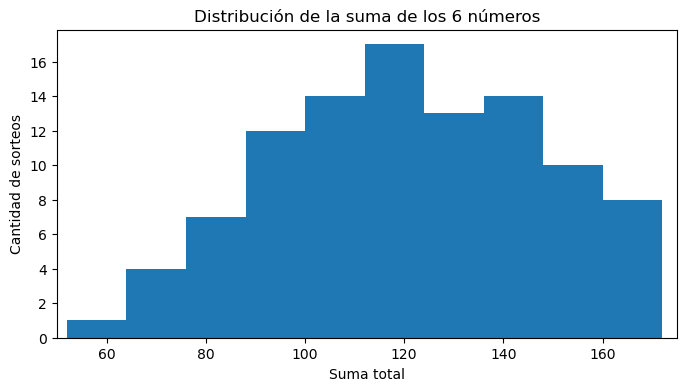

In [97]:
plt.figure(figsize=(8,4))
plt.hist(sumas, bins=9)
plt.title("Distribución de la suma de los 6 números")
plt.xlabel("Suma total")
plt.xlim(50, 175)
plt.ylabel("Cantidad de sorteos")
plt.show()

In [57]:
# --------- 11) PROBABILIDAD EMPÍRICA DE CADA NÚMERO ----------
# Probabilidad de que aparezca en un sorteo
prob_sorteo = freq / total_sorteos

prob_df = pd.DataFrame({
    'numero': freq.index,
    'probabilidad_en_sorteo': prob_sorteo.values
}).sort_values(by='probabilidad_en_sorteo', ascending=False)

print("\nProbabilidad empírica de aparición por sorteo:")
display(prob_df.head(10))


Probabilidad empírica de aparición por sorteo:


,numero,probabilidad_en_sorteo
26,27,0.24
32,33,0.21
27,28,0.21
9,10,0.21
29,30,0.20
23,24,0.20
37,38,0.19
16,17,0.19
4,5,0.19
28,29,0.19


In [63]:
# --------- 12) GENERADOR DE NÚMEROS PROBABLES (HEURÍSTICO) ----------
# Selecciona números ponderados por frecuencia histórica

weights = freq / freq.sum()
numeros = freq.index.values

def generar_combinacion():
    seleccion = np.random.choice(numeros, size=6, replace=False, p=weights)
    return seleccion

print("\n5 combinaciones sugeridas basadas en frecuencia histórica:\n")
for _ in range(5):
    print(generar_combinacion())


5 combinaciones sugeridas basadas en frecuencia histórica:

[33 34  4 21  9 30]
[38 14 10 29 36  9]
[27 35 15 33 13  6]
[34 31 22 15 37 20]
[18  6  2 26 20 24]


In [58]:
# --------- 13) DETECTAR NÚMEROS "CALIENTES" Y "FRÍOS" ----------
media = freq.mean()
desv = freq.std()

calientes = freq[freq > media + desv] #números inusualmente altos y que se encuentran aislados de los demas
frios = freq[freq < media - desv] #lo mismo pero viceversa

print("\nNúmeros calientes (muy frecuentes):")
print(sorted(calientes.index.tolist()))

print("\nNúmeros fríos (muy poco frecuentes):")
print(sorted(frios.index.tolist()))



Números calientes (muy frecuentes):
[10, 24, 27, 28, 30, 33]

Números fríos (muy poco frecuentes):
[3, 21, 23, 25]
